# Prediction with Random Forest

In [67]:
import pandas as pd
import numpy as np
import unicodedata
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import time, math
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
from scipy.stats import spearmanr, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

### Import the preprocessed Data

In [21]:
train_df = pd.read_csv('data/preprocessed/preprocessed_drugs_train.csv', index_col=0)
test_df = pd.read_csv('data/preprocessed/preprocessed_drugs_test.csv', index_col=0)

train_df.shape, test_df.shape

((8564, 595), (3671, 549))

In [22]:
train_df.head()

,drug_id,administrative_status,approved_for_hospital_use,reimbursement_rate,marketing_declaration_date,marketing_authorization_date,price,logprice,marketing_authorization_process=autorisation d'importation parallèle,marketing_authorization_process=procédure centralisée,...,pca_activ_382,pca_activ_383,pca_activ_384,pca_activ_385,pca_activ_386,pca_activ_387,pca_activ_388,pca_activ_389,pca_activ_390,pca_activ_391
0,0_train,1,1,5,2014,2014,2.83,1.040277,0,0,...,0.019471,-0.050241,0.075678,-0.180086,-0.056829,0.018404,0.065872,0.006508,0.010035,6.326715e-15
1,1_train,1,1,5,2013,2009,14.30,2.660260,0,0,...,0.004439,-0.191459,-0.088540,0.093350,-0.144961,-0.146435,-0.043342,-0.053204,-0.114939,1.353930e-14
2,2_train,1,1,5,2000,1996,5.66,1.733424,0,0,...,-0.025441,0.029313,-0.016844,-0.056362,0.029476,0.009436,0.000652,0.001061,0.001770,-4.868899e-15
3,3_train,1,1,5,2005,2004,24.27,3.189241,0,0,...,-0.018233,-0.457792,-0.809749,0.712797,0.178036,0.038852,-0.038273,-0.029904,0.013671,-1.646763e-14
4,4_train,1,0,4,2015,2010,59.94,4.093344,0,0,...,0.013399,-0.034579,0.052155,-0.124235,-0.039282,0.012741,0.045613,0.004511,0.006961,8.452655e-16


Drop 'price' and 'drug id' columns

In [25]:
#train_df = train_df.drop(['price', 'drug_id'], axis=1)
#train_df.head()

In [26]:
# Mean Absolute Percentage Error
def mape_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = make_scorer(mape_error, greater_is_better=False)

In [61]:
hyperparameters = {'n_estimators': 50, 
                'n_jobs': -1, 
                'verbose': 1
                }   

FEATURES = [col for col in train_df.columns if col not in ['price', 'logprice', 'drug_id']]

In [63]:
mape_err = []
rmse_err = []
mae_err = []

X = train_df[FEATURES].values
y = train_df['logprice'].values

kfold = KFold(n_splits=5)
kfold = KFold(n_splits=5)
kfold.get_n_splits(X)

for train_index, valid_index in kfold.split(X):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
        
    regressor = RandomForestRegressor(**hyperparameters)
    t0 = time.time()
    regressor.fit(X_train, y_train)
    print("Fit in %0.3fs" % (time.time() - t0))
    y_pred = regressor.predict(X_valid)

    curr_mape_err = mape_error(np.exp(y_valid), np.exp(y_pred))
    curr_rmse_err = np.sqrt(mse(np.exp(y_valid), np.exp(y_pred)))
    curr_mae_err = mae(np.exp(y_valid), np.exp(y_pred))
    
    mape_err.append(curr_mape_err)
    rmse_err.append(curr_rmse_err)
    mae_err.append(curr_mae_err)
    print("MAPE error: {} | MSE error: {} | MAE error: {}".format(curr_mape_err, curr_rmse_err, curr_mae_err))
        
print("*** MAPE Error : mean =", np.mean(mape_err), '; std =', np.std(mape_err))
print("*** RMSE Error : mean =", np.mean(rmse_err), '; std =', np.std(rmse_err))
print("*** MAE Error : mean =", np.mean(mae_err), '; std =', np.std(mae_err))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Fit in 20.063s
MAPE error: 49.00663915420868 | MSE error: 55.39819017708713 | MAE error: 14.287836528337152


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


Fit in 20.284s
MAPE error: 49.374731166345306 | MSE error: 52.771999073033186 | MAE error: 13.312335688957127


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


Fit in 20.590s
MAPE error: 46.83849207425237 | MSE error: 58.295954824977485 | MAE error: 14.604012262241177


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


Fit in 20.908s
MAPE error: 46.1472612014067 | MSE error: 68.51654299311252 | MAE error: 16.49549382511017


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s


Fit in 20.680s
MAPE error: 44.10237080415828 | MSE error: 57.04387227884879 | MAE error: 14.208981721619132
*** MAPE Error : mean = 47.09389888007426 ; std = 1.93759474785204
*** RMSE Error : mean = 58.40531186941182 ; std = 5.382926072186142
*** MAE Error : mean = 14.58173200525295 ; std = 1.0487769110845968


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


 **Feature importance**

<AxesSubplot:title={'center':'Feature importances (Train set)'}>

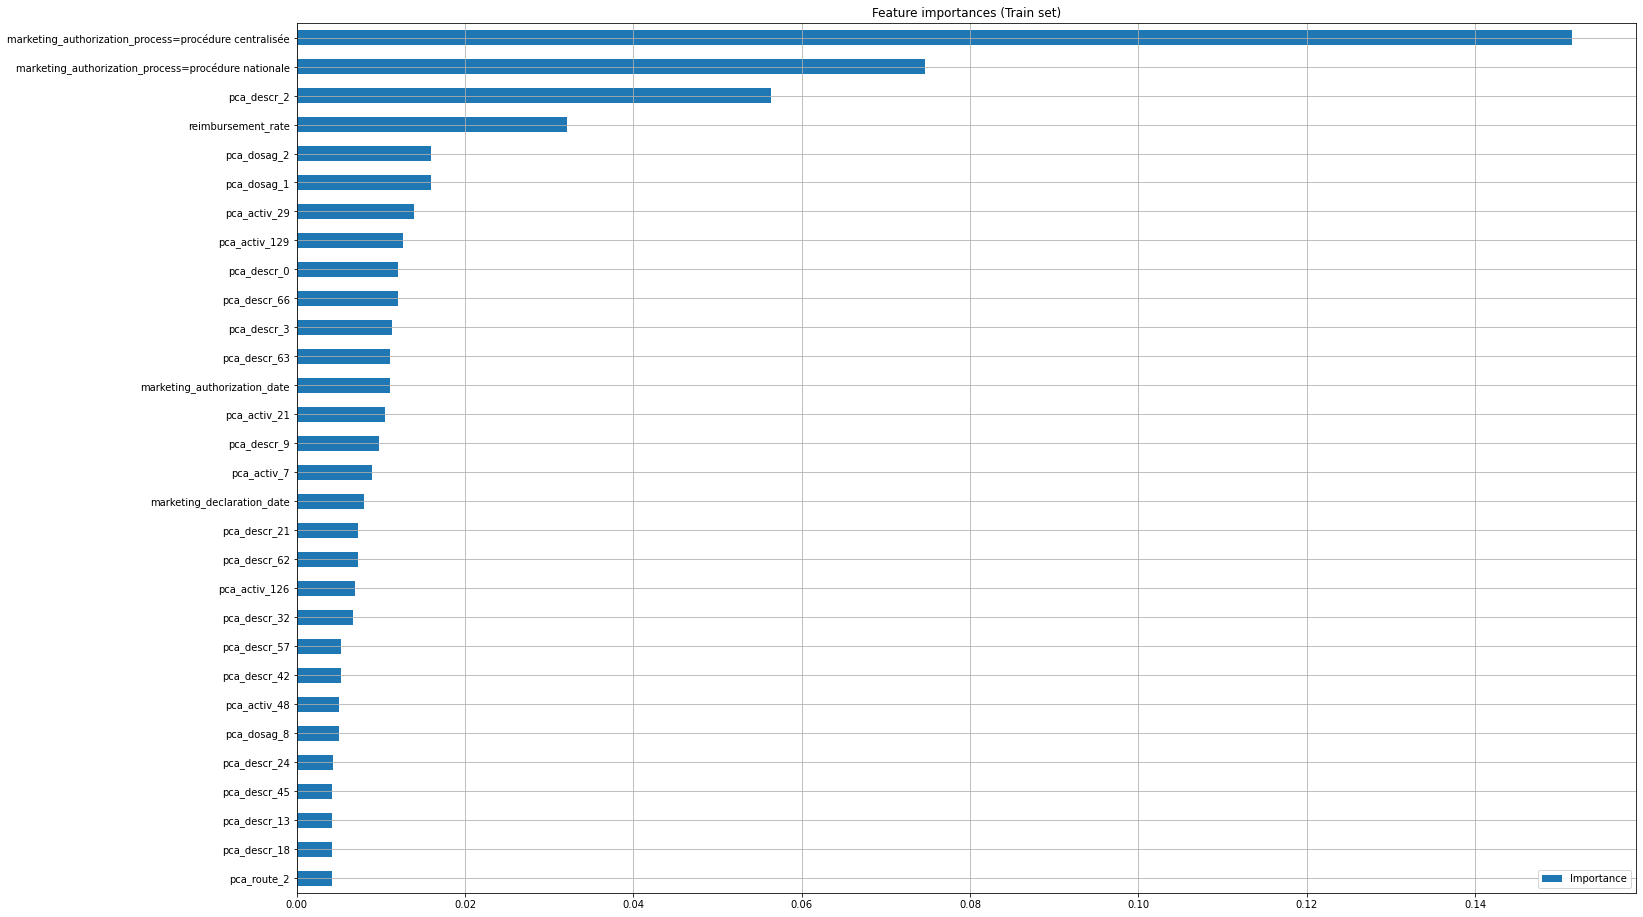

In [56]:
importance_df = pd.DataFrame(clf.feature_importances_, columns=["Importance"], index=list(FEATURES)).sort_values(['Importance'], ascending = True)
importance_df = importance_df.iloc[-30:]  
importance_df.plot(kind='barh', title ="Feature importances (Train set)", grid=True, figsize=(24, 16))

**We use the last validation set and use it to make predictions**

We visualize the scatter plot of the predictions and compute a correlation metric.


Train

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


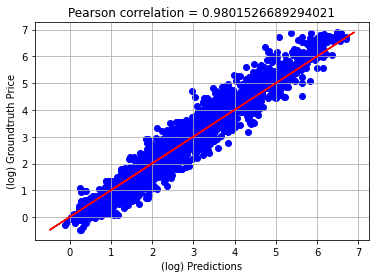

In [48]:
#plt.scatter(np.exp(y_pred), np.exp(y_valid), c='blue')
y_pred_train = clf.predict(X_train)
r = pearsonr(y_train, y_pred_train)
plt.scatter(y_pred_train, y_train, c='blue')
plt.plot(y_train, y_train, c='red')
plt.grid()
plt.xlabel("(log) Predictions")
plt.ylabel("(log) Groundtruth Price")
plt.title("Pearson correlation = {}".format(r[0]))
plt.show()

## Hyperparameter tuning

**Train test split**

In [58]:
X = train_df[FEATURES].values
y = train_df['logprice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((6851, 592), (1713, 592))

**Hyperparameters search grid**

We will try adjusting the following set of hyperparameters:

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [72]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
              'max_features': max_features
              }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'max_features': ['auto', 'sqrt']}


In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 20,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1
                              )

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


**Best parameters**

In [ ]:
rf_random.best_params_

**Predictions**

In [ ]:
rf_best = rf_random.best_estimator_
y_pred_test = rf_best.predict(X_test)

mape_test = mape_error(np.exp(y_test), np.exp(y_pred_test))
rmse_test = np.sqrt(mse(np.exp(y_test), np.exp(y_pred_test)))
mae_test = mae(np.exp(y_test), np.exp(y_pred_test))

***Scatter plot***

In [ ]:
#plt.scatter(np.exp(y_pred), np.exp(y_valid), c='blue')

r = pearsonr(y_test, y_pred_test)
plt.scatter(y_pred_test, y_test, c='blue')
plt.plot(y_pred_test, y_test, c='red')
plt.grid()
plt.xlabel("(log) Predictions")
plt.ylabel("(log) Groundtruth Price")
plt.title("Pearson correlation = {}".format(r[0]))
plt.show()